In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../scenes/')
import syndiff as sd 
from delta_kernal import *
import pandas as pd

In [2]:
t = np.load('2020fqvlc1.npy')
t[1,:] -= 40
tm = -2.5*np.log10(t[1,:])+19.9

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
def Six_med(Data):
    time = Data[:,0]
    lc = Data[:,1]
    steps = round((time[-1]-time[0]) * 4) # 4 lots of 6 hours in a day
    
    six_time = []
    six_lc = []
    for i in range(int(steps)):
        obs = np.where((time >= time[0]+i) & (time < time[0]+(i+1)))[0]
        six_time += [np.nanmean(time[obs])]
        six_lc += [np.nanmean(lc[obs])]
    six = np.ones((len(six_time),2))
    six[:,0] = six_time
    six[:,1] = six_lc
    return six

In [4]:
gd = pd.read_csv('2020fqv_yse.csv')

In [5]:
ind = np.where(np.isfinite(t[0]))[0]
data = np.array([t[0,ind]-58930,t[1,ind]])


In [6]:
data.shape

(2, 1235)

In [7]:
six = Six_med(data.T)

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


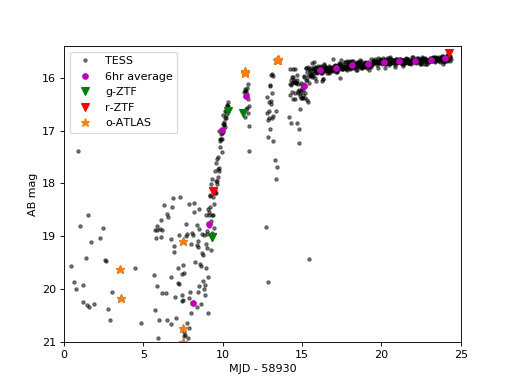

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
plt.figure()
plt.plot(t[0]-58930,tm,'k.',alpha=0.5,label='TESS')
plt.plot(six[:,0],-2.5*np.log10(six[:,1]) + 19.9,'m.',ms=10,label='6hr average')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='g-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='g-ZTF'],'gv',ms=8,label='g-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='r-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'],'rv',ms=8,label='r-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'].values,'*',ms=8)
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'],'*',ms=8,label='o-ATLAS')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='i']-58930,gd['MAG'].iloc[gd['FLT'].values=='i'],'ko',ms=8)


plt.legend()
plt.ylim(21,15.4)
plt.xlim(0,25)
plt.xlabel('MJD - 58930')
plt.ylabel('AB mag')
plt.savefig('2020fqv_progress.pdf')

In [183]:
gt = gd['MJD'].iloc[gd['FLT'].values=='g-ZTF'].values-58930
gm = gd['MAG'].iloc[gd['FLT'].values=='g-ZTF'].values
rt = gd['MJD'].iloc[gd['FLT'].values=='r-ZTF'].values-58930
rm = gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'].values
ot = gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS'].values-58930
om = gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'].values

In [184]:
def mag_2_cts(mag):
    cts = 10**(-1/2.5*(mag + 48.6))
    return cts

<IPython.core.display.Javascript object>


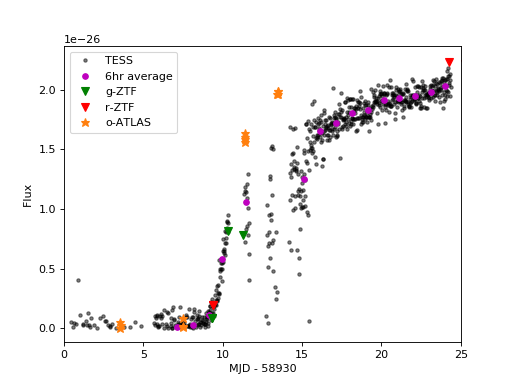

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [218]:
plt.figure()
plt.plot(t[0]-58930,mag_2_cts(tm),'k.',alpha=0.5,label='TESS')
plt.plot(six[:,0],mag_2_cts(-2.5*np.log10(six[:,1]) + 19.9),'m.',ms=10,label='6hr average')
plt.plot(gt,mag_2_cts(gm),'gv',ms=8,label='g-ZTF')
plt.plot(rt,mag_2_cts(rm),'rv',ms=8,label='r-ZTF')
plt.plot(ot,mag_2_cts(om),'*',ms=1)
plt.plot(ot,mag_2_cts(om),'*',ms=8,label='o-ATLAS')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'],'*',ms=8,label='o-ATLAS')
#plt.plot(gd['MJD'].iloc[gd['FLT'].values=='i']-58930,gd['MAG'].iloc[gd['FLT'].values=='i'],'ko',ms=8)


plt.legend()
#plt.ylim(21,15.5)
plt.xlim(0,25)
plt.xlabel('MJD - 58930')
plt.ylabel('Flux ')
plt.savefig('2020fqv_progress_flux.pdf')

In [110]:
fig, ax = plt.subplots()
plt.plot(t[0]-58930,tm,'k.',alpha=0.5,label='TESS')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='g-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='g-ZTF'],'gv',ms=8,label='g-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='r-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'],'rv',ms=8,label='r-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'],'*',ms=8,label='o-ATLAS')


plt.ylim(20,15)

plt.ylabel('Apparent magnitude')
plt.xlabel('Time (MJD)')
plt.minorticks_on()

time_span = [2.5,20]

axins = ax.inset_axes([1.1, 0, 0.47, 1])#width='50%',height='50%',bbox_to_anchor=([150,30,200,100]))
ylim = []

ylim += Insert_region(axins,time_span,tess_data,'k','TESS ($I$)')
ylim += Insert_region(axins,time_span,c_day,'c','Atlas ($c$)')
ylim += Insert_region(axins,time_span,o_day,'orange','Atlas ($o$)')
axins.locator_params(axis='x', nbins=3)

plt.plot(t[0]-58930,tm,'k.',alpha=0.5,label='TESS')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='g-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='g-ZTF'],'gv',ms=8,label='g-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='r-ZTF']-58930,gd['MAG'].iloc[gd['FLT'].values=='r-ZTF'],'rv',ms=8,label='r-ZTF')
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'].values,'*',ms=8)
plt.plot(gd['MJD'].iloc[gd['FLT'].values=='orange-ATLAS']-58930,gd['MAG'].iloc[gd['FLT'].values=='orange-ATLAS'],'*',ms=8,label='o-ATLAS')

axins.set_xlim(time_span)
axins.set_ylim(20,15.5)
axins.set_ylim(20,15.5)
axins.minorticks_on()
axins.legend(loc=4)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax.indicate_inset_zoom(axins,ec='k',lw=2)
plt.savefig('test.pdf', bbox_inches="tight");

<IPython.core.display.Javascript object>

NameError: name 'Insert_region' is not defined